## Problem Statement

The goal here is to train a binary classifier on the training dataset to predict the ‘Expense’ column which has two possible values ">50K" and "<=50K" and evaluate the accuracy of the classifier with the test dataset.

**About the dataset**

The data set consists of anonymous information such as occupation, age, native country, race, capital gain, capital loss, education, work class and more.

Each row is labeled as either having a salary greater than ">50K" or "<=50K".

Note that the dataset is made up of categorical and continuous features. It also contains missing values.

The categorical columns are: workclass, education, marital_status, occupation, relationship, race, sex, native_country
The continuous columns are: age, education_num, capital_gain, capital_loss, hours_per_week


## Attribute Information

**age**: continuous.

**workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

**education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

**education-num**: continuous.

**marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

**occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

**relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

**race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

**sex**: Female, Male.

**capital-gain**: continuous.

**capital-loss**: continuous.

**hours-per-week**: continuous.

**native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

**class**: >50K, <=50K

<a id='import_lib'></a>
## 1. Import Libraries

**Let us import the required libraries and functions**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
plt.rcParams['figure.figsize'] = [15,8]

In [ ]:
df_expenses = pd.read_csv("Expense.csv")
df_expenses.head()

age      workclass      education  education-num       marital-status  \
0   39   Self-emp-inc      Bachelors             13   Married-civ-spouse   
1   20        Private   Some-college             10        Never-married   
2   50        Private      Doctorate             16   Married-civ-spouse   
3   38      State-gov        HS-grad              9   Married-civ-spouse   
4   23      Local-gov      Bachelors             13        Never-married   

         occupation relationship    race      sex  capital-gain  capital-loss  \
0   Exec-managerial      Husband   White     Male         15024             0   
1     Other-service    Own-child   White     Male             0             0   
2    Prof-specialty      Husband   White     Male             0          1902   
3    Prof-specialty         Wife   White   Female             0             0   
4    Prof-specialty    Own-child   White   Female             0             0   

   hours-per-week  native-country Expense  
0              50   United-States    >50K  
1              40   United-States   <=50K  
2              65   United-States    >50K  
3              40   United-States    >50K  
4              60   United-States   <=50K

In [ ]:
df_expenses.shape

(5000, 14)

In [ ]:
df_expenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             5000 non-null   int64 
 1   workclass       5000 non-null   object
 2   education       5000 non-null   object
 3   education-num   5000 non-null   int64 
 4   marital-status  5000 non-null   object
 5   occupation      5000 non-null   object
 6   relationship    5000 non-null   object
 7   race            5000 non-null   object
 8   sex             5000 non-null   object
 9   capital-gain    5000 non-null   int64 
 10  capital-loss    5000 non-null   int64 
 11  hours-per-week  5000 non-null   int64 
 12  native-country  5000 non-null   object
 13  Expense         5000 non-null   object
dtypes: int64(5), object(9)
memory usage: 547.0+ KB


* Summary of the dataset shows that there are no missing values.

In [ ]:
df_expenses.describe()

age  education-num  capital-gain  capital-loss  hours-per-week
count  5000.000000    5000.000000   5000.000000   5000.000000     5000.000000
mean     38.656000      10.065000   1104.080000     90.032800       40.566200
std      13.698292       2.558141   7579.674371    404.168991       12.154191
min      17.000000       1.000000      0.000000      0.000000        1.000000
25%      28.000000       9.000000      0.000000      0.000000       40.000000
50%      37.000000      10.000000      0.000000      0.000000       40.000000
75%      48.000000      12.000000      0.000000      0.000000       45.000000
max      90.000000      16.000000  99999.000000   3004.000000       99.000000

In [ ]:
df_expenses['workclass'].value_counts()

 Private             3444
 Self-emp-not-inc     385
 ?                    320
 Local-gov            318
 State-gov            199
 Self-emp-inc         184
 Federal-gov          148
 Without-pay            1
 Never-worked           1
Name: workclass, dtype: int64

In [ ]:
df_expenses['workclass']

0        Self-emp-inc
1             Private
2             Private
3           State-gov
4           Local-gov
            ...      
4995          Private
4996          Private
4997          Private
4998          Private
4999          Private
Name: workclass, Length: 5000, dtype: object

In [ ]:

cols=list(df_expenses.select_dtypes(include='object').columns)

for i in cols:

  print(df_expenses[i].value_counts())


 Private             3444
 Self-emp-not-inc     385
 ?                    320
 Local-gov            318
 State-gov            199
 Self-emp-inc         184
 Federal-gov          148
 Without-pay            1
 Never-worked           1
Name: workclass, dtype: int64
 HS-grad         1602
 Some-college    1142
 Bachelors        823
 Masters          259
 Assoc-voc        214
 11th             179
 Assoc-acdm       157
 10th             156
 7th-8th          105
 Prof-school       90
 9th               84
 12th              57
 Doctorate         56
 5th-6th           46
 1st-4th           25
 Preschool          5
Name: education, dtype: int64
 Married-civ-spouse       2294
 Never-married            1643
 Divorced                  683
 Separated                 159
 Widowed                   150
 Married-spouse-absent      67
 Married-AF-spouse           4
Name: marital-status, dtype: int64
 Craft-repair         630
 Prof-specialty       619
 Exec-managerial      609
 Sales                59

In [ ]:
df_expenses.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Expense           0
dtype: int64

In [ ]:
df_expenses.std()

age                 13.698292
education-num        2.558141
capital-gain      7579.674371
capital-loss       404.168991
hours-per-week      12.154191
dtype: float64

**None of the variables have zero variance. Which means all the variables are contributing to the model building.**

**Detect any Anamolies**

In [ ]:
df_expenses.describe().T

count       mean          std   min   25%   50%   75%  \
age             5000.0    38.6560    13.698292  17.0  28.0  37.0  48.0   
education-num   5000.0    10.0650     2.558141   1.0   9.0  10.0  12.0   
capital-gain    5000.0  1104.0800  7579.674371   0.0   0.0   0.0   0.0   
capital-loss    5000.0    90.0328   404.168991   0.0   0.0   0.0   0.0   
hours-per-week  5000.0    40.5662    12.154191   1.0  40.0  40.0  45.0   

                    max  
age                90.0  
education-num      16.0  
capital-gain    99999.0  
capital-loss     3004.0  
hours-per-week     99.0

In [ ]:
pip install pandas_profiling

In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport
report = ProfileReport(df_expenses)
report.to_file(output_file='report_expenses.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## **Missing Values**

In [ ]:
df_expenses[df_expenses == ' ?'] = np.nan

In [ ]:
df_expenses.isnull().sum()

age                 0
workclass         320
education           0
education-num       0
marital-status      0
occupation        321
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country     98
Expense             0
dtype: int64

In [ ]:
(df_expenses.isnull().sum()/(df_expenses.index.size)*100).sort_values(ascending=False)

occupation        6.42
workclass         6.40
native-country    1.96
age               0.00
education         0.00
education-num     0.00
marital-status    0.00
relationship      0.00
race              0.00
sex               0.00
capital-gain      0.00
capital-loss      0.00
hours-per-week    0.00
Expense           0.00
dtype: float64

* Encode ? as NaNs

##### Again check the summary of dataframe

In [ ]:
df_expenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             5000 non-null   int64 
 1   workclass       4680 non-null   object
 2   education       5000 non-null   object
 3   education-num   5000 non-null   int64 
 4   marital-status  5000 non-null   object
 5   occupation      4679 non-null   object
 6   relationship    5000 non-null   object
 7   race            5000 non-null   object
 8   sex             5000 non-null   object
 9   capital-gain    5000 non-null   int64 
 10  capital-loss    5000 non-null   int64 
 11  hours-per-week  5000 non-null   int64 
 12  native-country  4902 non-null   object
 13  Expense         5000 non-null   object
dtypes: int64(5), object(9)
memory usage: 547.0+ KB


In [ ]:
objects = df_expenses.select_dtypes('object').columns

In [ ]:
num_cols = df_expenses.select_dtypes(include = np.number)

In [ ]:
num_cols.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [ ]:
objects

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'Expense'],
      dtype='object')

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent',verbose=0)

# fit it on all objects

imputer=imputer.fit(df_expenses[objects].iloc[:,:])

df_expenses[objects]=imputer.transform(df_expenses[objects])

# df_expenses =pd.DataFrame(df_expenses_trans,columns=df_expenses.columns)

In [ ]:
df_expenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             5000 non-null   int64 
 1   workclass       5000 non-null   object
 2   education       5000 non-null   object
 3   education-num   5000 non-null   int64 
 4   marital-status  5000 non-null   object
 5   occupation      5000 non-null   object
 6   relationship    5000 non-null   object
 7   race            5000 non-null   object
 8   sex             5000 non-null   object
 9   capital-gain    5000 non-null   int64 
 10  capital-loss    5000 non-null   int64 
 11  hours-per-week  5000 non-null   int64 
 12  native-country  5000 non-null   object
 13  Expense         5000 non-null   object
dtypes: int64(5), object(9)
memory usage: 547.0+ KB


###### Do variables have outliers?


In [ ]:
num_cols.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [ ]:
num_cols=num_cols[['age','hours-per-week','capital-gain','capital-loss']]

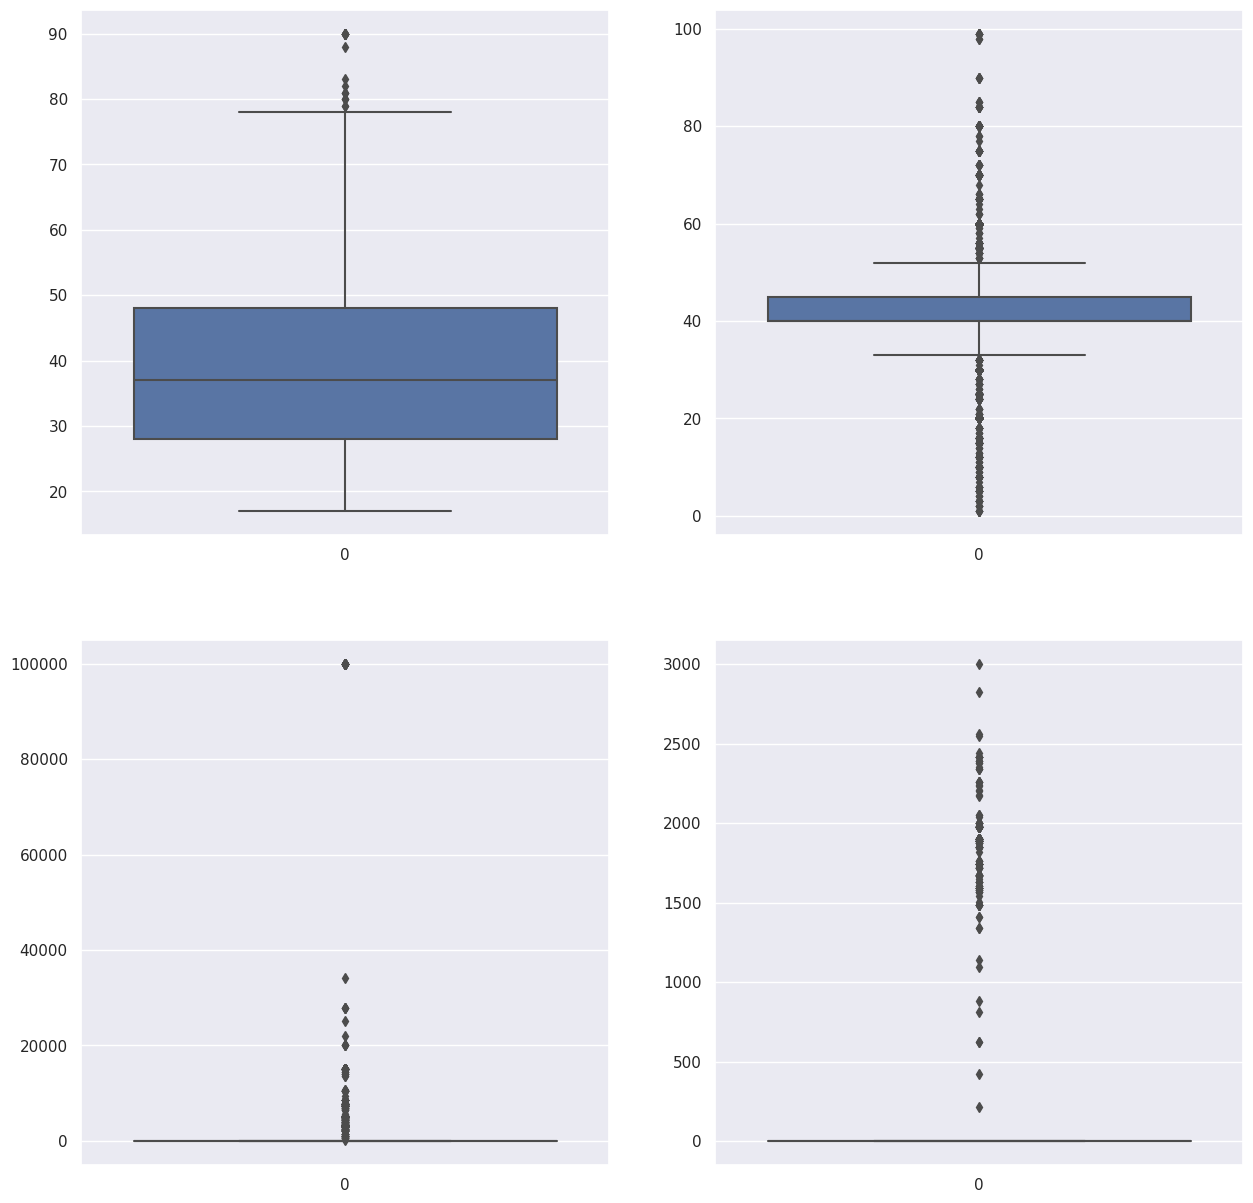

In [ ]:
fig, ax=plt.subplots(2,2,figsize=(15,15))
for var, subplot in zip(num_cols.columns,ax.flatten()):
  sns.boxplot(num_cols[var],ax=subplot)

plt.show()

##### Target distributed evenly

In [ ]:
df_expenses['Expense'].unique()

array([' >50K', ' <=50K'], dtype=object)

In [ ]:
df_expenses['Expense']=df_expenses['Expense'].map({' <=50K': 0, ' >50K': 1})

In [ ]:
df_expenses['Expense'].value_counts(normalize=True) * 100

0    75.52
1    24.48
Name: Expense, dtype: float64

#### Correlation Matrix for Numeric Data

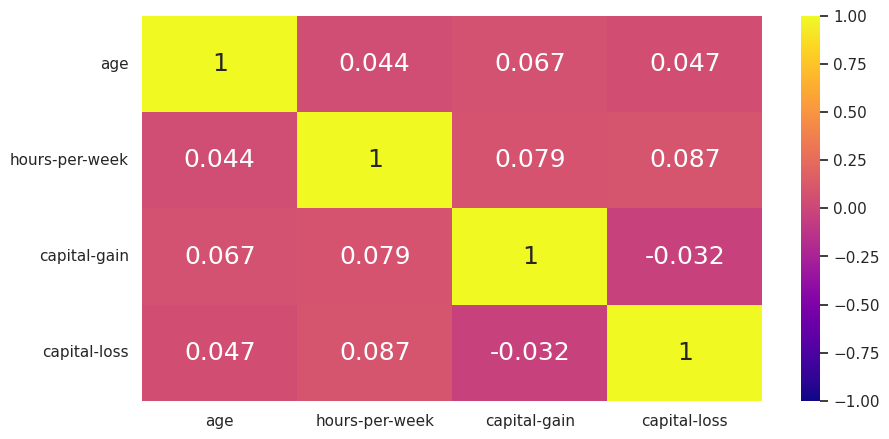

In [ ]:
plt.figure(figsize=(10,5))
sns.set(font_scale=1)
sns.heatmap(num_cols.corr(),
            cmap='plasma',
            vmax=1.0,
            vmin=-1.0,
            annot = True,
            annot_kws={"size": 18})
plt.show()

In [ ]:
pip install pandas_profiling

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
reports = ProfileReport(df_expenses)
reports

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
pip install category_encoders

In [ ]:
import category_encoders as ce

In [ ]:
cols=df_expenses['workclass']
cols

0        Self-emp-inc
1             Private
2             Private
3           State-gov
4           Local-gov
            ...      
4995          Private
4996          Private
4997          Private
4998          Private
4999          Private
Name: workclass, Length: 5000, dtype: object

In [ ]:
df_expenses.head()

age      workclass      education  education-num       marital-status  \
0   39   Self-emp-inc      Bachelors             13   Married-civ-spouse   
1   20        Private   Some-college             10        Never-married   
2   50        Private      Doctorate             16   Married-civ-spouse   
3   38      State-gov        HS-grad              9   Married-civ-spouse   
4   23      Local-gov      Bachelors             13        Never-married   

         occupation relationship    race      sex  capital-gain  capital-loss  \
0   Exec-managerial      Husband   White     Male         15024             0   
1     Other-service    Own-child   White     Male             0             0   
2    Prof-specialty      Husband   White     Male             0          1902   
3    Prof-specialty         Wife   White   Female             0             0   
4    Prof-specialty    Own-child   White   Female             0             0   

   hours-per-week  native-country  Expense  
0              50   United-States        1  
1              40   United-States        0  
2              65   United-States        1  
3              40   United-States        1  
4              60   United-States        0

In [ ]:
cat_columns = df_expenses.select_dtypes(object).columns

## Encoding of Categorical Variables

In [ ]:
encoder = ce.WOEEncoder(cols=cat_columns)
encode_data =encoder.fit_transform(df_expenses[cat_columns],df_expenses['Expense'])

In [ ]:
encode_data

workclass  education  marital-status  occupation  relationship  \
0      1.539872   0.725021        0.968321    1.037001      0.937510   
1     -0.167548  -0.384527       -1.902022   -1.934122     -3.146165   
2     -0.167548   2.367151        0.968321    0.980256      0.937510   
3      0.149164  -0.368765        0.968321    0.980256      1.289741   
4      0.124464   0.725021       -1.902022    0.980256     -3.146165   
...         ...        ...             ...         ...           ...   
4995  -0.167548  -0.368765        0.968321   -0.677132      0.937510   
4996  -0.167548  -0.384527       -1.902022    0.527601     -3.146165   
4997  -0.167548  -1.519554       -1.902022   -0.155496     -3.146165   
4998  -0.167548  -0.368765        0.968321   -0.297996      0.937510   
4999  -0.167548  -0.368765       -1.113013   -0.297996     -1.057800   

          race       sex  native-country  
0     0.085567  0.302285        0.028287  
1     0.085567  0.302285        0.028287  
2     0.085567  0.302285        0.028287  
3     0.085567 -0.863275        0.028287  
4     0.085567 -0.863275        0.028287  
...        ...       ...             ...  
4995  0.085567  0.302285        0.028287  
4996  0.085567 -0.863275        0.028287  
4997  0.085567  0.302285        0.028287  
4998  0.085567  0.302285       -1.503363  
4999  0.085567  0.302285        0.028287  

[5000 rows x 8 columns]

In [ ]:
encoder

WOEEncoder(cols=Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object'))

In [ ]:
num_cols = df_expenses.select_dtypes(int).columns

In [ ]:
num_cols

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'Expense'],
      dtype='object')

In [ ]:
df_salary= pd.concat([pd.DataFrame(df_expenses[num_cols]),encode_data],axis=1)
df_salary.head()

age  education-num  capital-gain  capital-loss  hours-per-week  Expense  \
0   39             13         15024             0              50        1   
1   20             10             0             0              40        0   
2   50             16             0          1902              65        1   
3   38              9             0             0              40        1   
4   23             13             0             0              60        0   

   workclass  education  marital-status  occupation  relationship      race  \
0   1.539872   0.725021        0.968321    1.037001      0.937510  0.085567   
1  -0.167548  -0.384527       -1.902022   -1.934122     -3.146165  0.085567   
2  -0.167548   2.367151        0.968321    0.980256      0.937510  0.085567   
3   0.149164  -0.368765        0.968321    0.980256      1.289741  0.085567   
4   0.124464   0.725021       -1.902022    0.980256     -3.146165  0.085567   

        sex  native-country  
0  0.302285        0.028287  
1  0.302285        0.028287  
2  0.302285        0.028287  
3 -0.863275        0.028287  
4 -0.863275        0.028287

In [ ]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   int64  
 1   education-num   5000 non-null   int64  
 2   capital-gain    5000 non-null   int64  
 3   capital-loss    5000 non-null   int64  
 4   hours-per-week  5000 non-null   int64  
 5   Expense         5000 non-null   int64  
 6   workclass       5000 non-null   float64
 7   education       5000 non-null   float64
 8   marital-status  5000 non-null   float64
 9   occupation      5000 non-null   float64
 10  relationship    5000 non-null   float64
 11  race            5000 non-null   float64
 12  sex             5000 non-null   float64
 13  native-country  5000 non-null   float64
dtypes: float64(8), int64(6)
memory usage: 547.0 KB


In [ ]:
Y=df_salary.Expense
X=df_salary[['age', 'education-num','sex',
               'capital-gain','capital-loss', 'hours-per-week',
               'native-country','occupation', 'workclass',
               'relationship','race', 'marital-status', 'education']]

In [ ]:
X.head()

age  education-num       sex  capital-gain  capital-loss  hours-per-week  \
0   39             13  0.302285         15024             0              50   
1   20             10  0.302285             0             0              40   
2   50             16  0.302285             0          1902              65   
3   38              9 -0.863275             0             0              40   
4   23             13 -0.863275             0             0              60   

   native-country  occupation  workclass  relationship      race  \
0        0.028287    1.037001   1.539872      0.937510  0.085567   
1        0.028287   -1.934122  -0.167548     -3.146165  0.085567   
2        0.028287    0.980256  -0.167548      0.937510  0.085567   
3        0.028287    0.980256   0.149164      1.289741  0.085567   
4        0.028287    0.980256   0.124464     -3.146165  0.085567   

   marital-status  education  
0        0.968321   0.725021  
1       -1.902022  -0.384527  
2        0.968321   2.367151  
3        0.968321  -0.368765  
4       -1.902022   0.725021

<a id='Model'></a>
## 4. Model Building(Model)

**Split the data into training and test sets**

In [ ]:
 from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.30,
                                                    stratify = Y,
                                                    random_state=0)

In [ ]:
X_train.head()

age  education-num       sex  capital-gain  capital-loss  \
4364   28              9  0.302285             0             0   
4851   18              6  0.302285             0             0   
948    43              9 -0.863275             0             0   
4486   35              6  0.302285             0             0   
1390   36             13  0.302285             0             0   

      hours-per-week  native-country  occupation  workclass  relationship  \
4364              40        0.028287   -0.297996   0.252165     -3.146165   
4851              11        0.028287   -1.934122  -0.167548     -3.146165   
948               40        0.028287   -0.801241   0.149164     -1.553922   
4486              50        0.028287   -0.677132  -0.167548     -1.057800   
1390              40        0.028287   -0.801241   0.124464      0.937510   

          race  marital-status  education  
4364  0.085567       -1.902022  -0.368765  
4851  0.085567       -1.902022  -1.205318  
948  -0.756959       -1.902022  -0.368765  
4486  0.085567       -1.113013  -1.205318  
1390  0.085567        0.968321   0.725021

In [ ]:
X_test.head()

age  education-num       sex  capital-gain  capital-loss  \
2315   47              7  0.302285             0             0   
4585   33             13  0.302285             0             0   
2829   37             10  0.302285             0             0   
3888   33             12 -0.863275             0             0   
1081   59              9 -0.863275             0             0   

      hours-per-week  native-country  occupation  workclass  relationship  \
2315              40        0.028287   -0.155496  -0.167548     -1.057800   
4585              55        0.028287    1.037001  -0.167548      0.937510   
2829              40        0.028287   -0.297996   0.491714     -1.057800   
3888              40        0.028287   -0.801241   0.491714     -1.553922   
1081              40        0.028287    0.167183   0.124464     -1.553922   

          race  marital-status  education  
2315 -0.756959       -1.902022  -1.519554  
4585  0.085567        0.968321   0.725021  
2829  0.085567       -1.902022  -0.384527  
3888 -0.756959       -1.902022   0.346113  
1081 -0.756959       -1.393602  -0.368765

In [ ]:
y_train.value_counts()

0    2643
1     857
Name: Expense, dtype: int64

In [ ]:
y_test.value_counts()

0    1133
1     367
Name: Expense, dtype: int64

<a id='Logistic_regression'></a>
### 4.1 Logistic Regression



In [ ]:
import statsmodels
import statsmodels.api as sm

In [ ]:
X_train_c=sm.add_constant(X_train)
X_test_c=sm.add_constant(X_test)

In [ ]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
logreg = sm.Logit(y_train, X_train_c).fit()

# print the summary of the model
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.332703
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                Expense   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3486
Method:                           MLE   Df Model:                           13
Date:                Fri, 15 Sep 2023   Pseudo R-squ.:                  0.4023
Time:                        01:00:29   Log-Likelihood:                -1164.5
converged:                       True   LL-Null:                       -1948.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -5.3190      0.833     -6.388      0.000      -6.951      -3.687
age              

**McFadden R2**

 The `Pseudo R-squ.` above is the value of `McFadden's R-squared`.

<p style='text-indent:25em'> <strong> McFadden's R-squared = $ 1 - \frac{Log-Likelihood}{LL-Null} $</strong> </p>

**AIC - Akaike Information Criteria**

 The AIC is relative measure. To know if

<p style='text-indent:25em'> <strong> AIC = $ -2({Log-Likelihood})
 + 2k$</strong> </p>

**Interpretation of variables**

Interpretation in terms of Log(odds)

In [ ]:
logreg.params

# Log(odds)=beta0+beta1 * X1 +beta2 * X2 +beta3 * X3
# For every one unit change in X1  there is beta1 units change in Log(odds)

const            -5.318954
age               0.023744
education-num     0.159512
sex              -0.009076
capital-gain      0.000284
capital-loss      0.000614
hours-per-week    0.028113
native-country    0.641307
occupation        0.587981
workclass         0.030401
relationship      0.529810
race              0.448343
marital-status    0.453681
education         0.199828
dtype: float64

**Interpretation in terms of Odds**

In [ ]:
odds= (np.exp(logreg.params))

odds

const             0.004898
age               1.024028
education-num     1.172938
sex               0.990965
capital-gain      1.000284
capital-loss      1.000614
hours-per-week    1.028512
native-country    1.898960
occupation        1.800349
workclass         1.030867
relationship      1.698609
race              1.565715
marital-status    1.574095
education         1.221192
dtype: float64

### Predict and Find the Model Performance Metrics

In [ ]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = logreg.predict(X_test_c)

# print the y_pred_prob
y_pred_prob.head()

2315    0.016153
4585    0.695037
2829    0.034641
3888    0.020167
1081    0.043171
dtype: float64

In [ ]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]

In [ ]:
# print the first five observations of y_pred
y_pred[0:5]

[0, 1, 0, 0, 0]

#### Lets find the model accuracy

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8466666666666667


### Confusion Matrix

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

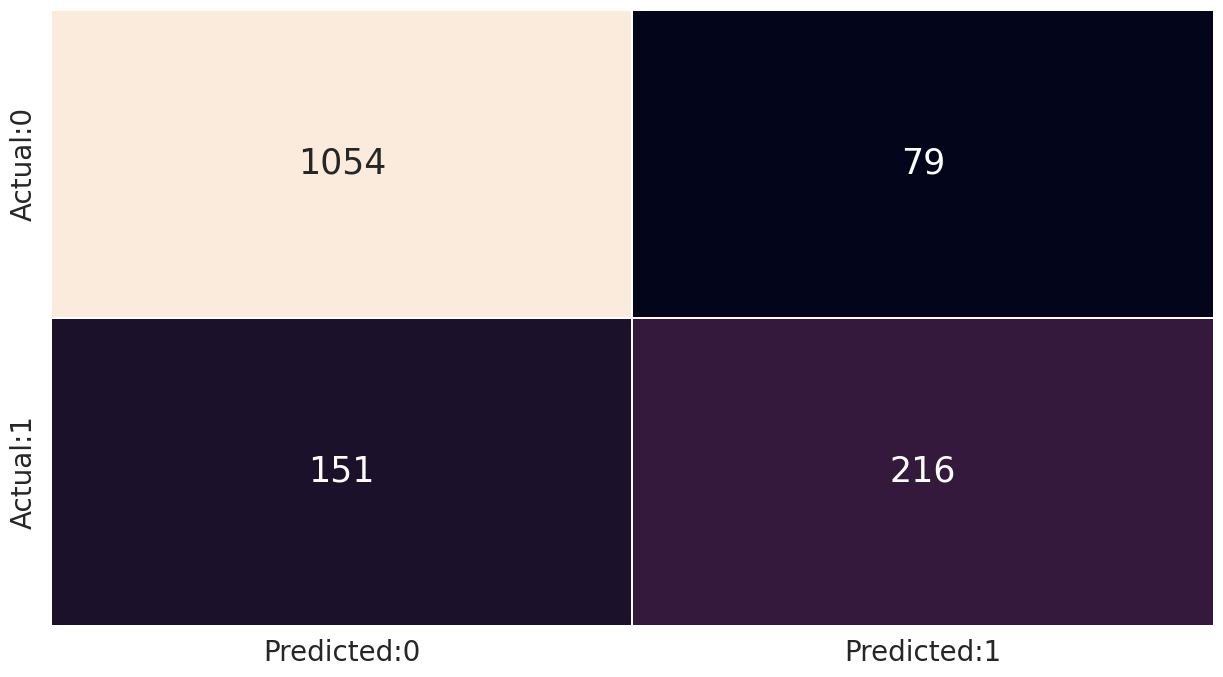

In [ ]:

cm = confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False,
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)

plt.show()

In [ ]:
TN = cm[0,0]

TP = cm[1,1]

FP = cm[0,1]

FN = cm[1,0]

### Performance Matrix

**Precision:** It is defined as the ratio of true positives to the total positive predictions.

In [ ]:
precision = TP / (TP+FP)
precision

0.7322033898305085

**Recall:** It is the ratio of true positives to the total actual positive observations. It is also known as, `Sensitivity` or `True Positive Rate`.

In [ ]:
recall = TP / (TP+FN)
recall

0.5885558583106267

**Specificity:** It is the ratio of true negatives to the total actual negative observations.

In [ ]:
specificity = TN / (TN+FP)
specificity

0.9302736098852604

**f1-score:** It is defined as the harmonic mean of precision and recall.

In [ ]:
f1_score = 2*((precision*recall)/(precision+recall))

f1_score

0.6525679758308157

**Accuracy:** It is the ratio of correct predictions (i.e. TN+TP) to the total observations. According to the confusion matrix, it is the ratio of the sum of diagonal elements to the sum of all the in the matrix. It is not a very good measure if the dataset is imbalanced.

In [ ]:
accuracy = (TN+TP) / (TN+FP+FN+TP)

accuracy

0.8466666666666667

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1133
           1       0.73      0.59      0.65       367

    accuracy                           0.85      1500
   macro avg       0.80      0.76      0.78      1500
weighted avg       0.84      0.85      0.84      1500



In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score

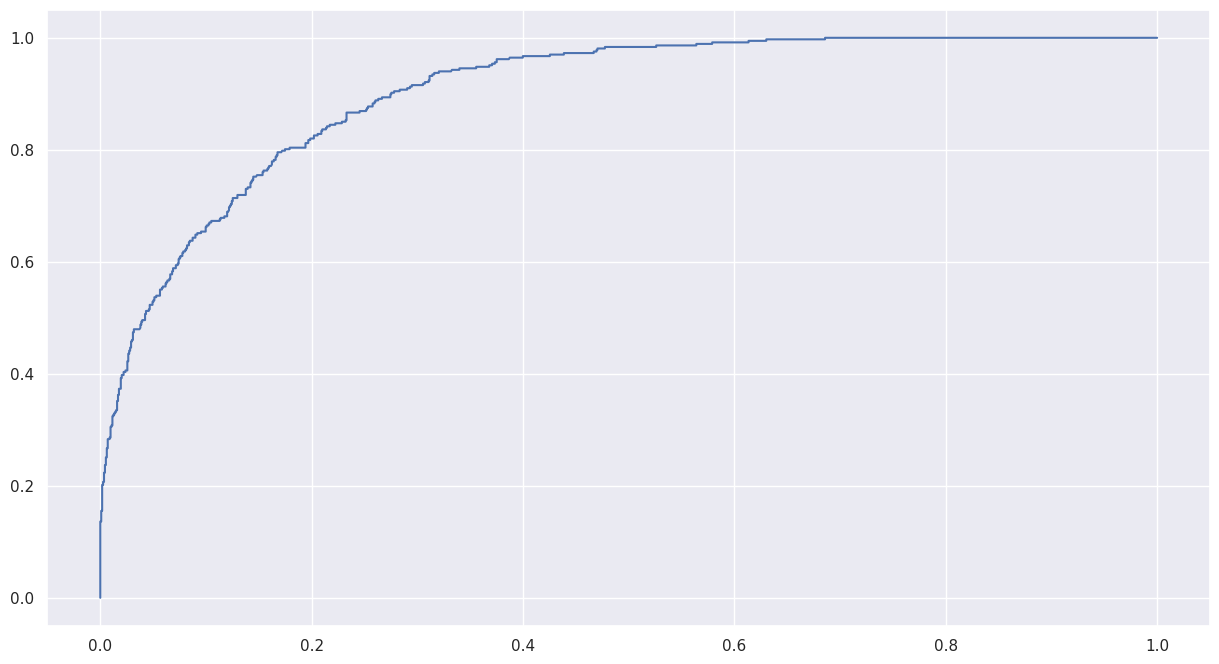

In [ ]:
fpr,tpr,threshold =roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr)
plt.show()

In [ ]:
print(roc_auc_score(y_test,y_pred_prob))

0.9023510681535601


**Reliability- cohen kappa score**

In [ ]:
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(y_test,y_pred))

0.55568148157688


**All at one Summary Table**

In [ ]:
from sklearn.metrics import recall_score,precision_score,f1_score

In [ ]:
perf_score = pd.DataFrame(columns=["Model", "Accuracy","Recall","Precision","F1 Score"] )

In [ ]:
def per_measures(model,test,pred):


  accuracy    =accuracy_score(test,pred)
  f1score     =f1_score(test,pred)
  recall      =recall_score(test,pred)
  precision   =precision_score(test,pred)
  # aic         =model.aic
  # reliability = cohen_kappa_score(test,pred)



  return (accuracy,recall,precision,f1score,)

In [ ]:
def update_performance (name,
                        model,
                        test,
                        pred
                           ):

    # assign 'comp_perf' as global variable
    global perf_score


    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    perf_score = perf_score.append({'Model'       : name,
                                    'Accuracy'    : per_measures(model,test,pred)[0],
                                    'Recall'      : per_measures(model,test,pred)[1],
                                    'Precision'   : per_measures(model,test,pred)[2],
                                    'F1 Score'    : per_measures(model,test,pred)[3]
                                    # 'AIC'         : per_measures(model,ytest,ypred)[4],
                                    # 'Reliability' : per_measures(model,ytest,ypred)[5]

                                     },
                                   ignore_index = True)

In [ ]:
update_performance(name = 'LogisticReg-Base', model = logreg,test=y_test,pred=y_pred)

# print the dataframe
perf_score

Model  Accuracy    Recall  Precision  F1 Score
0  LogisticReg-Base  0.846667  0.588556   0.732203  0.652568

Youden's Index is the classification cut-off probability for which the (Sensitivity + Specificity - 1) is maximized.<br>

<p style='text-indent:12em'> <strong>Youden's Index = max(Sensitivity + Specificity - 1) = max(TPR + TNR - 1) = max(TPR - FPR) </strong> </p>

i.e. select the cut-off probability for which the (TPR - FPR) is maximum.

In [ ]:
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': threshold})


# calculate the difference between TPR and FPR for each threshold and store the values in a new column 'Difference'
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR


youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
youdens_table.head()

TPR       FPR  Threshold  Difference
0  0.866485  0.233010   0.231343    0.633475
1  0.891008  0.263019   0.199555    0.627990
2  0.795640  0.167696   0.304262    0.627944
3  0.888283  0.260371   0.202324    0.627913
4  0.844687  0.217123   0.250297    0.627564

In [ ]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred_youden = [ 0 if x < 0.23 else 1 for x in y_pred_prob]

In [ ]:
acc_table = classification_report(y_test, y_pred_youden)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.95      0.77      0.85      1133
           1       0.54      0.87      0.67       367

    accuracy                           0.79      1500
   macro avg       0.75      0.82      0.76      1500
weighted avg       0.85      0.79      0.80      1500



In [ ]:
update_performance(name = 'LogisticReg-Youden', model = logreg,test=y_test,pred=y_pred_youden)

# print the dataframe
perf_score

Model  Accuracy    Recall  Precision  F1 Score
0    LogisticReg-Base  0.846667  0.588556   0.732203  0.652568
1  LogisticReg-Youden  0.790000  0.866485   0.544521  0.668770

### SKLearn- Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
Y=df_salary.Expense
X=df_salary[['age', 'education-num','sex',
               'capital-gain','capital-loss', 'hours-per-week',
               'native-country','occupation', 'workclass',
               'relationship','race', 'marital-status', 'education']]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.30,
                                                    stratify = Y,
                                                    random_state=0)

In [ ]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

ypred_lr_train = lr.predict(X_train)
ypred_lr= lr.predict(X_test)

ypred_lr

array([0, 1, 0, ..., 1, 0, 0])

In [ ]:
print(accuracy_score(y_test,ypred_lr))
print(confusion_matrix(y_test,ypred_lr))
print(classification_report(y_test,ypred_lr))

0.842
[[1049   84]
 [ 153  214]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1133
           1       0.72      0.58      0.64       367

    accuracy                           0.84      1500
   macro avg       0.80      0.75      0.77      1500
weighted avg       0.83      0.84      0.84      1500



In [ ]:
update_performance(name = 'LogisticReg-skl', model = lr,test=y_test,pred=ypred_lr)

# print the dataframe
perf_score

Model  Accuracy    Recall  Precision  F1 Score
0    LogisticReg-Base  0.846667  0.588556   0.732203  0.652568
1  LogisticReg-Youden  0.790000  0.866485   0.544521  0.668770
2     LogisticReg-skl  0.842000  0.583106   0.718121  0.643609


## Naive Bayes



In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [ ]:
gnb = GaussianNB()

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred_gnb = gnb.predict(X_test)

print(classification_report(y_test, y_pred_gnb))
print(accuracy_score(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1133
           1       0.68      0.54      0.60       367

    accuracy                           0.83      1500
   macro avg       0.77      0.73      0.75      1500
weighted avg       0.82      0.83      0.82      1500

0.826


The overall accuracy is 83%. The fit is quite good. As we both the classes of target variable >50K & <=50K are of same importance, we may look into the accuracy as the evaluation matrix of the problem or we can look it the weigthed average f1-score.

We can conclude that the overall fit is quite good.



Cohens kappa - The kappa statistic is frequently used to test interrater reliability. The importance of rater reliability lies in the fact that it represents

The extent to which the data collected in the study are correct representations of the variables measured.

In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred_gnb)

0.4942984246394858

##### How do you improve the accuracy of the model?

The model we hvae consider is a basic model.There are various methods of improving the accuracy such as ,

i. We can tune the parameters.

ii. We may prepare the data better and so on.

##### Write clearly the changes that you will make before re-fitting the model.

One of the reason behind the under-performance of the model could be the insufficient proportion of diffrent classes in target variable i.e. >50K & <=50K.



In [ ]:
update_performance(name = 'Gaussian NB', model = gnb,test=y_test,pred=y_pred_gnb)

# print the dataframe
perf_score

Model  Accuracy    Recall  Precision  F1 Score
0    LogisticReg-Base  0.846667  0.588556   0.732203  0.652568
1  LogisticReg-Youden  0.790000  0.866485   0.544521  0.668770
2     LogisticReg-skl  0.842000  0.583106   0.718121  0.643609
3         Gaussian NB  0.826000  0.542234   0.681507  0.603945

**Bernoulli NB**

In [ ]:
bnb = BernoulliNB()

In [ ]:
bnb.fit(X_train,y_train)


ypred_bnb = bnb.predict(X_test)

print(accuracy_score(y_test,ypred_bnb))
print(confusion_matrix(y_test,ypred_bnb))
print(classification_report(y_test,ypred_bnb))

0.8013333333333333
[[955 178]
 [120 247]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.87      1133
           1       0.58      0.67      0.62       367

    accuracy                           0.80      1500
   macro avg       0.73      0.76      0.74      1500
weighted avg       0.81      0.80      0.81      1500



In [ ]:
update_performance(name = 'Bernoulli NB', model = bnb,test=y_test,pred=ypred_bnb)

# print the dataframe
perf_score

Model  Accuracy    Recall  Precision  F1 Score
0    LogisticReg-Base  0.846667  0.588556   0.732203  0.652568
1  LogisticReg-Youden  0.790000  0.866485   0.544521  0.668770
2     LogisticReg-skl  0.842000  0.583106   0.718121  0.643609
3         Gaussian NB  0.826000  0.542234   0.681507  0.603945
4        Bernoulli NB  0.801333  0.673025   0.581176  0.623737

## K-Nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn= KNeighborsClassifier(n_neighbors = 7)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
ypred_knn = knn.predict(X_test)

print(accuracy_score(y_test,ypred_knn))
print(confusion_matrix(y_test,ypred_knn))
print(classification_report(y_test,ypred_knn))

0.8286666666666667
[[1039   94]
 [ 163  204]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1133
           1       0.68      0.56      0.61       367

    accuracy                           0.83      1500
   macro avg       0.77      0.74      0.75      1500
weighted avg       0.82      0.83      0.82      1500



In [ ]:
update_performance(name = 'KNearestNeighbour', model = knn,test=y_test,pred=ypred_knn)

# print the dataframe
perf_score

Model  Accuracy    Recall  Precision  F1 Score
0    LogisticReg-Base  0.846667  0.588556   0.732203  0.652568
1  LogisticReg-Youden  0.790000  0.866485   0.544521  0.668770
2     LogisticReg-skl  0.842000  0.583106   0.718121  0.643609
3         Gaussian NB  0.826000  0.542234   0.681507  0.603945
4        Bernoulli NB  0.801333  0.673025   0.581176  0.623737
5   KNearestNeighbour  0.828667  0.555858   0.684564  0.613534

In [ ]:
pars = {'n_neighbors':[6,8,10,12,14,16,18],
       'algorithm':['auto','ball_tree','kd_tree','brute'],
       'p':[1,2],
       'metric':['minkowski','euclidean','manhattan','chebyshev','mahalanobis']}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_knn =GridSearchCV(KNeighborsClassifier(),param_grid=pars, refit=True, verbose =1)
grid_knn.fit(X_train,y_train)

Fitting 5 folds for each of 280 candidates, totalling 1400 fits


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['minkowski', 'euclidean', 'manhattan',
                                    'chebyshev', 'mahalanobis'],
                         'n_neighbors': [6, 8, 10, 12, 14, 16, 18],
                         'p': [1, 2]},
             verbose=1)

In [ ]:
grid_knn.best_params_

{'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 14, 'p': 1}

In [ ]:
knn_grid=KNeighborsClassifier(n_neighbors=14,
                         algorithm='auto',
                         metric = 'minkowski',
                         p=1

                         )
knn_grid.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=14, p=1)

In [ ]:
print('Classification report Test set :')
print(classification_report(y_test,knn_grid.predict(X_test)))

Classification report Test set :
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      1133
           1       0.72      0.48      0.58       367

    accuracy                           0.83      1500
   macro avg       0.78      0.71      0.73      1500
weighted avg       0.82      0.83      0.81      1500



In [ ]:
ypred_knn = knn_grid.predict(X_test)

In [ ]:
update_performance(name = 'KNearestNeighbour-grid', model = knn_grid,test=y_test,pred=ypred_knn)

# print the dataframe
perf_score

Model  Accuracy    Recall  Precision  F1 Score
0        LogisticReg-Base  0.846667  0.588556   0.732203  0.652568
1      LogisticReg-Youden  0.790000  0.866485   0.544521  0.668770
2         LogisticReg-skl  0.842000  0.583106   0.718121  0.643609
3             Gaussian NB  0.826000  0.542234   0.681507  0.603945
4            Bernoulli NB  0.801333  0.673025   0.581176  0.623737
5       KNearestNeighbour  0.828667  0.555858   0.684564  0.613534
6  KNearestNeighbour-grid  0.826667  0.479564   0.718367  0.575163

### Decision Tree
Decision Tree is a non-parametric supervised learning method. It builds a model in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets, which is called splitting. A decision node is a node on which a decision of split is to be made. A node that can not be split further is known as the terminal/leaf node. A leaf node represents the decision. A decision tree can work with both numerical and categorical variables.


## Gini Index

Gini index measures the probability of the sample being wrongly classified. The value of the Gini index varies between 0 and 1. We choose the variable with a low Gini index. The Gini index of the variable is calculated as:
<p style='text-indent:28em'> <strong> $ Gini = 1 - \sum_{i = 1}^{n}p_{i}^{2} $</strong> </p>

Where,<br>
$p_{i}$: Probability of occurrence of the class 'i'

## Entropy

Entropy is one of the criteria used to build the decision tree. It calculates the heterogeneity of the sample. The entropy is zero if the sample is completely homogeneous, and it is equal to 1 if the sample is equally divided. Entropy of the variable 'X' is calculated as:
<p style='text-indent:28em'> <strong> $ E(X) =  -\sum_{i = 1}^{c}p_{i}log_{2}p_{i} $</strong> </p>

Where,<br>
$p_{i}$: Probability of occurrence of the class 'i'

And the conditional emtropy of the variable is given as:
<p style='text-indent:28em'> <strong> $ E(T, X) = \sum_{c \epsilon X}P(c)E(c) $</strong> </p>

Where,<br>
$P(c)$: Probability of occurrence of the class 'c'<br>
$E(c)$: Entropy of the class 'c'

The information gain is the difference between the entropy of the target variable and the entropy of the target variable given an independent variable. We split the on the variable that corresponds to the highest information gain.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
dt = DecisionTreeClassifier(random_state=10)

dt.fit(X_train,y_train)

ypred_dt_train = dt.predict(X_train)


print(accuracy_score(y_train,ypred_dt_train))
print(confusion_matrix(y_train,ypred_dt_train))
print(classification_report(y_train,ypred_dt_train))

0.9917142857142857
[[2642    1]
 [  28  829]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2643
           1       1.00      0.97      0.98       857

    accuracy                           0.99      3500
   macro avg       0.99      0.98      0.99      3500
weighted avg       0.99      0.99      0.99      3500



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

ypred_dt= dt.predict(X_test)

print(classification_report(y_test, ypred_dt))
print(accuracy_score(y_test, ypred_dt))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      1133
           1       0.62      0.63      0.62       367

    accuracy                           0.81      1500
   macro avg       0.75      0.75      0.75      1500
weighted avg       0.81      0.81      0.81      1500

0.8133333333333334


## Over-fitting in Decision Tree

1. The decision tree is said to be over-fitted if it tries to perfectly fit all the observations in the training data. We can calculate the difference between the train and test accuracy to identify if there is over-fitting.
2. Overfitting occurs as the decision tree tries to get the purest form irrespective of the depth of the decision tree.  The tree becomes very big and lands up to be complex algo with several nodes.
3. Overfitting means tree is fitting well on training data and performs poorly on test data.

In [ ]:
update_performance(name = 'Decision Tree-Gini', model = dt,test=y_test,pred=ypred_dt)

# print the dataframe
perf_score

Model  Accuracy    Recall  Precision  F1 Score
0        LogisticReg-Base  0.846667  0.588556   0.732203  0.652568
1      LogisticReg-Youden  0.790000  0.866485   0.544521  0.668770
2         LogisticReg-skl  0.842000  0.583106   0.718121  0.643609
3             Gaussian NB  0.826000  0.542234   0.681507  0.603945
4            Bernoulli NB  0.801333  0.673025   0.581176  0.623737
5       KNearestNeighbour  0.828667  0.555858   0.684564  0.613534
6  KNearestNeighbour-grid  0.826667  0.479564   0.718367  0.575163
7      Decision Tree-Gini  0.813333  0.626703   0.616622  0.621622

**Lets visualize the Tree which is build by the Model**

In [ ]:
from sklearn import tree

In [ ]:
features=X_train.columns
dt_file=open('dt.dot','w')
dot_data=tree.export_graphviz(dt,out_file=dt_file,
                              feature_names=features,
                              class_names=['0','1'],
                              filled=True,
                              rounded=True)
dt_file.close()

**To visualize open Webgraphviz.com**

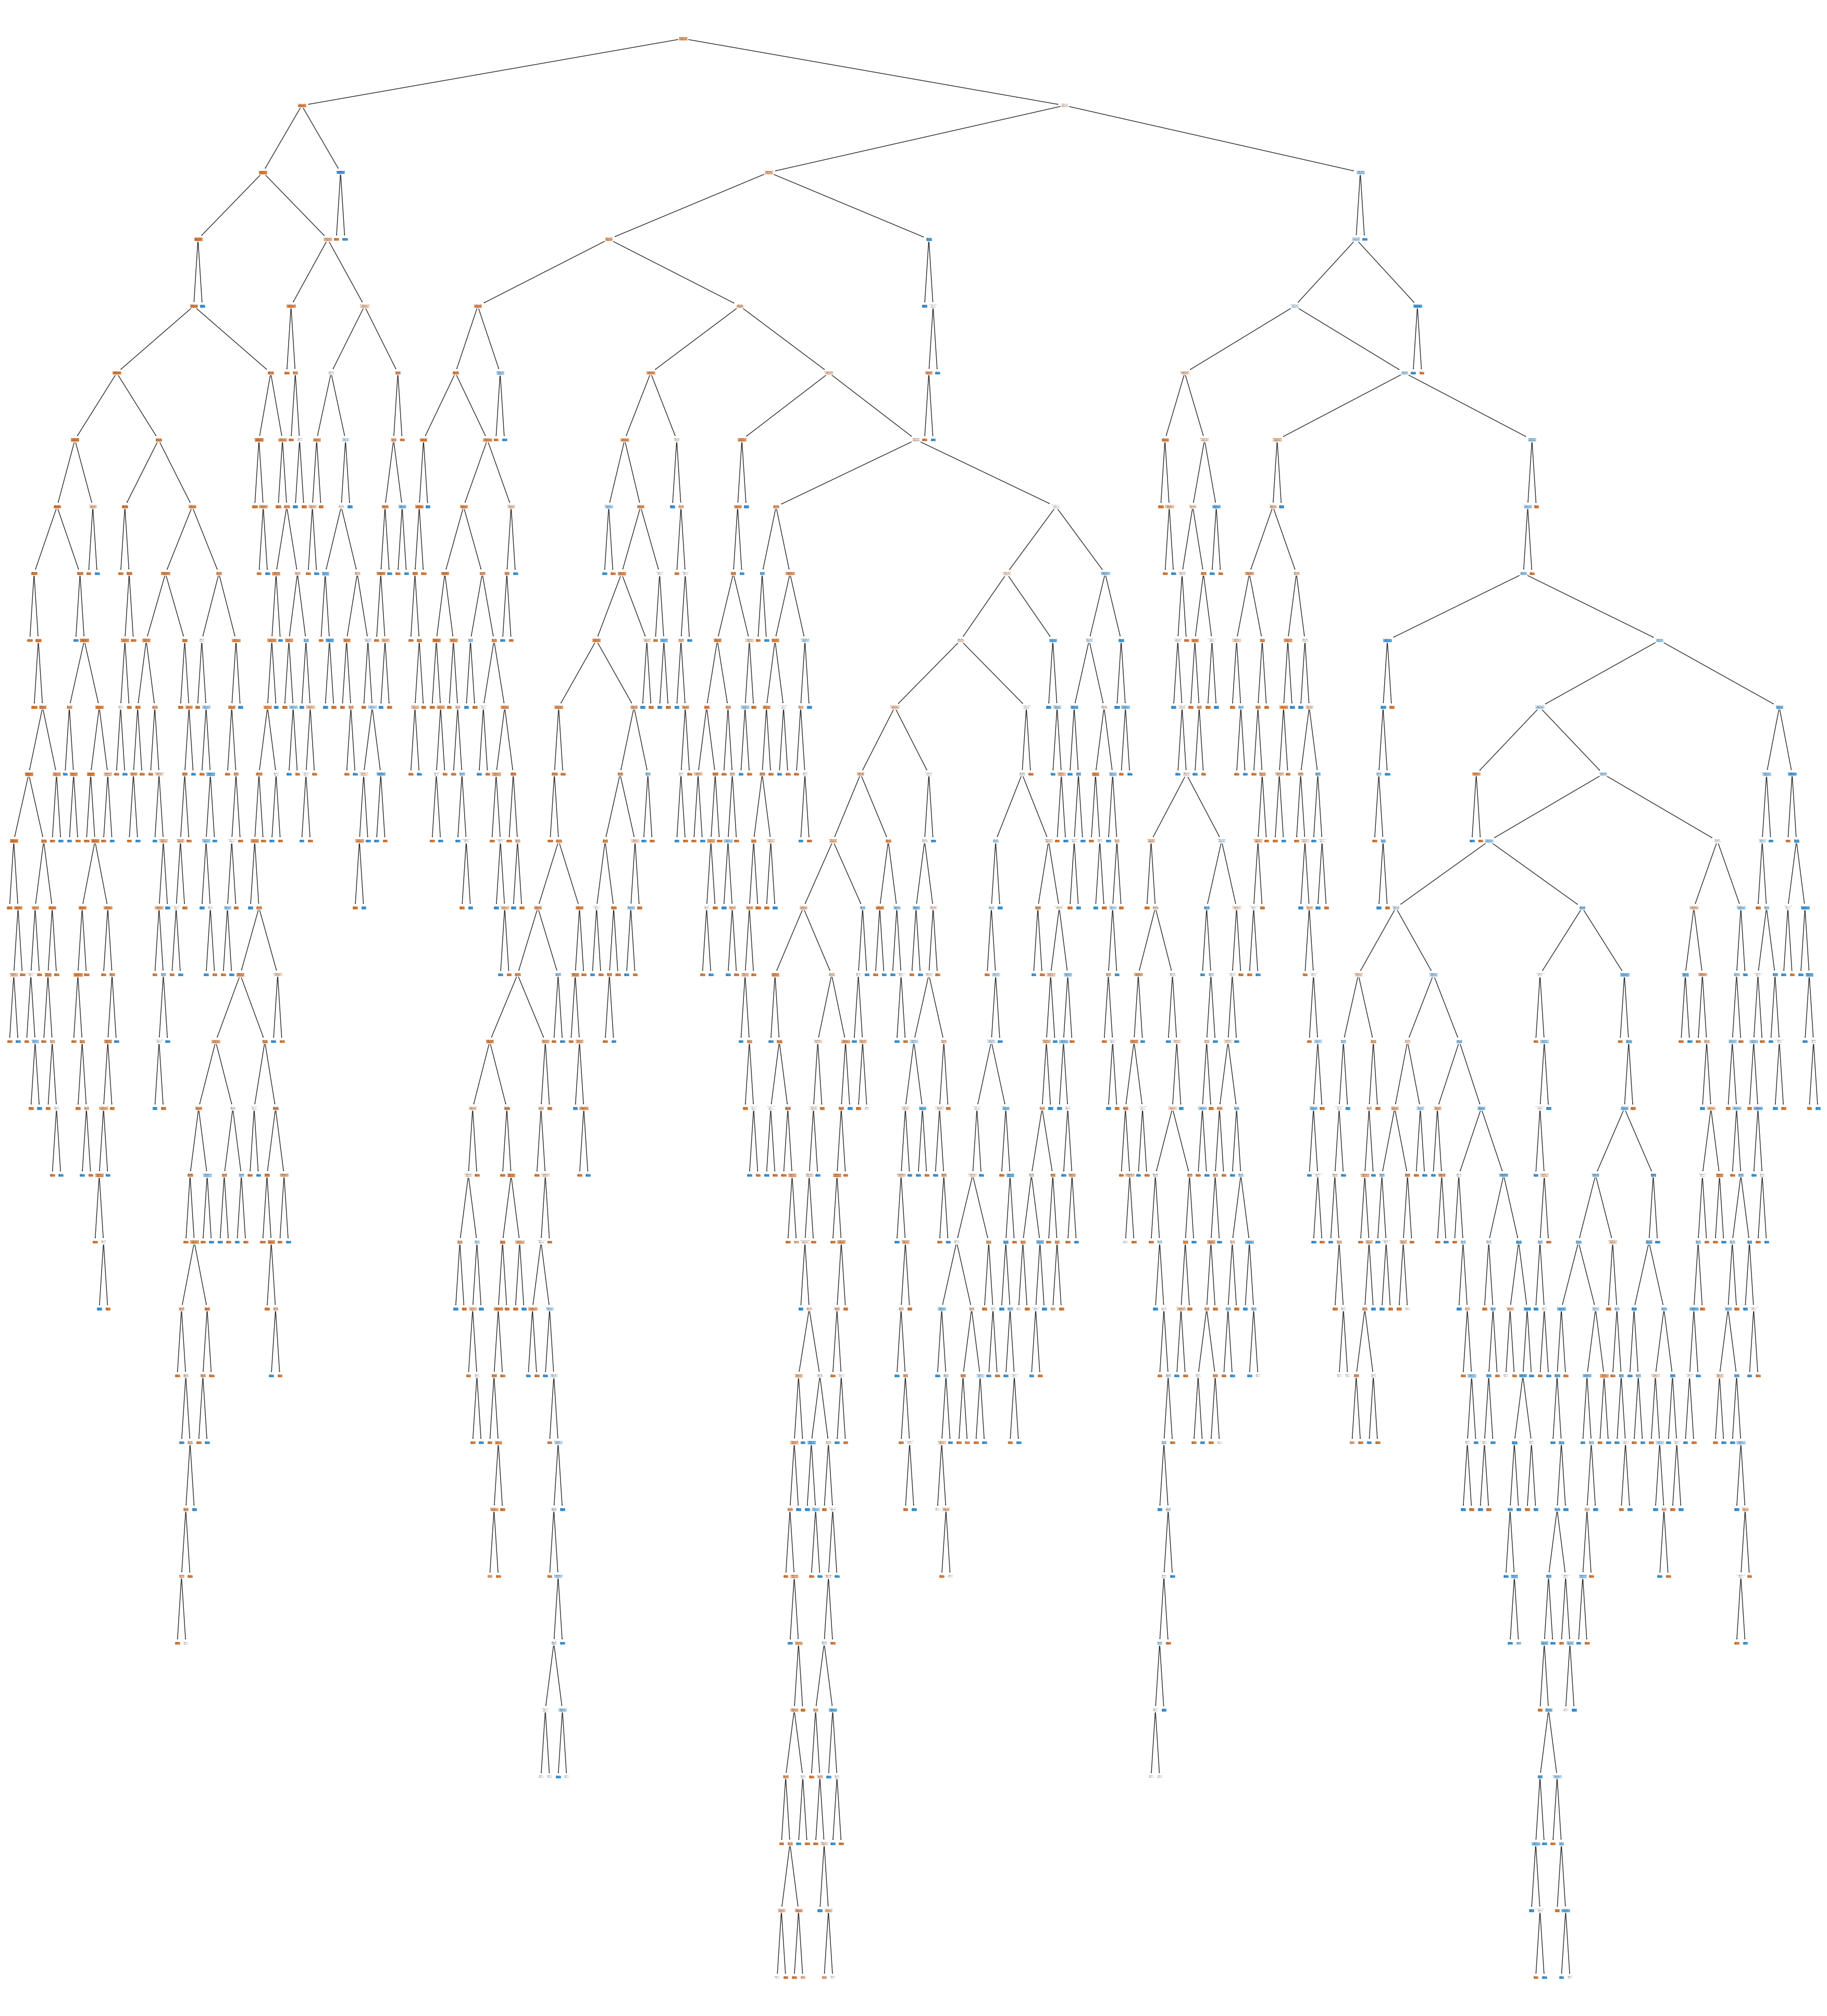

In [ ]:
from sklearn import tree

fig = plt.figure(figsize=(45,50))
_ = tree.plot_tree(dt,
                   feature_names=X_train.columns,
                   class_names=["0","1"],
                   filled=True) # it gives all the nodes in the color. If this is false then all of them will be in white

In [ ]:
dt_e = DecisionTreeClassifier(criterion='entropy',random_state=10)

dt_e.fit(X_train,y_train)

ypred_dt_e = dt_e.predict(X_test)


print(accuracy_score(y_test,ypred_dt_e))
print(confusion_matrix(y_test,ypred_dt_e))
print(classification_report(y_test,ypred_dt_e))

0.8106666666666666
[[980 153]
 [131 236]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1133
           1       0.61      0.64      0.62       367

    accuracy                           0.81      1500
   macro avg       0.74      0.75      0.75      1500
weighted avg       0.81      0.81      0.81      1500



**Update the performance**

In [ ]:
update_performance(name = 'Decision Tree-Entropy', model = dt_e,test=y_test,pred=ypred_dt_e)

# print the dataframe
perf_score

Model  Accuracy    Recall  Precision  F1 Score
0        LogisticReg-Base  0.846667  0.588556   0.732203  0.652568
1      LogisticReg-Youden  0.790000  0.866485   0.544521  0.668770
2         LogisticReg-skl  0.842000  0.583106   0.718121  0.643609
3             Gaussian NB  0.826000  0.542234   0.681507  0.603945
4            Bernoulli NB  0.801333  0.673025   0.581176  0.623737
5       KNearestNeighbour  0.828667  0.555858   0.684564  0.613534
6  KNearestNeighbour-grid  0.826667  0.479564   0.718367  0.575163
7      Decision Tree-Gini  0.813333  0.626703   0.616622  0.621622
8   Decision Tree-Entropy  0.810667  0.643052   0.606684  0.624339

**Lets Visualize the Tree formation using Entropy as the Criterion**

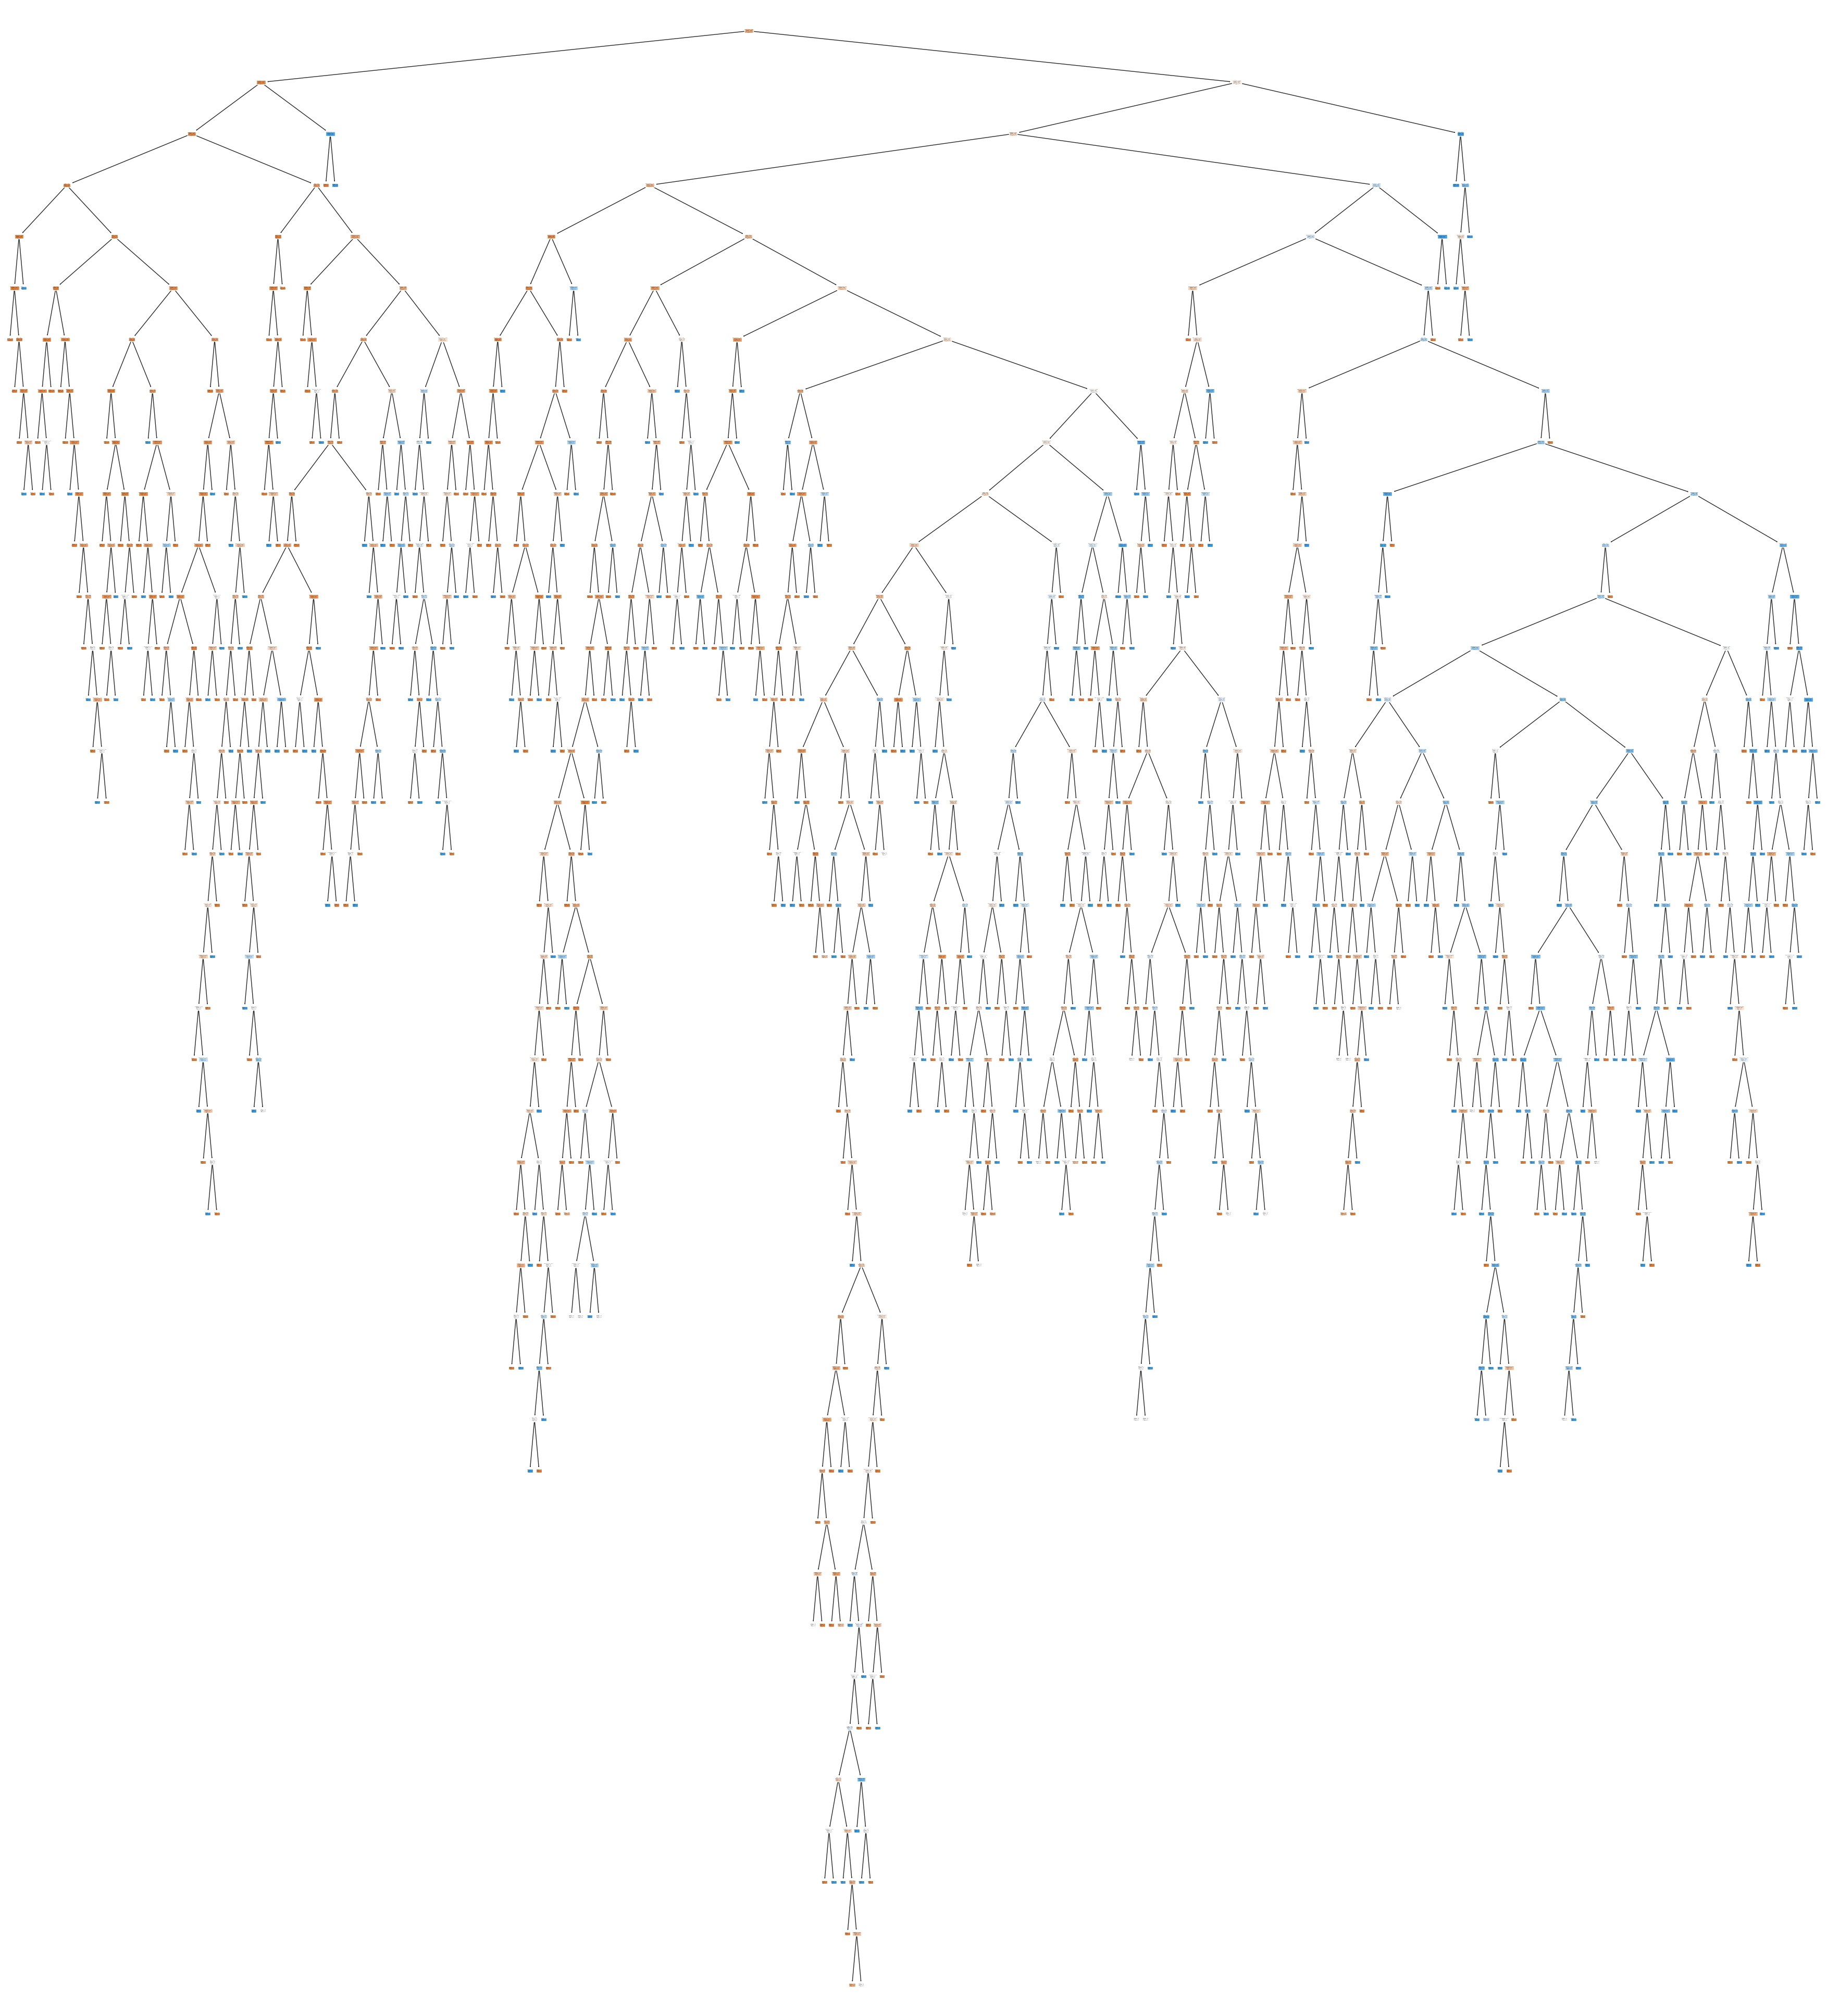

In [ ]:
fig = plt.figure(figsize=(45,50))
_ = tree.plot_tree(dt_e,
                   feature_names=X_train.columns,
                   class_names=["0","1"],
                   filled=True) # it gives all the nodes in the color. If this is false then all of them will be in white

**Lets Introduce some Hyper Parameters to tune the decision tree**

In [ ]:
dt_e3 = DecisionTreeClassifier(criterion='entropy',max_depth = 3,random_state=10)

dt_e3.fit(X_train,y_train)

ypred_dt_e3 = dt_e3.predict(X_test)

print(accuracy_score(y_test,ypred_dt_e3))
print(confusion_matrix(y_test,ypred_dt_e3))
print(classification_report(y_test,ypred_dt_e3))

0.836
[[1028  105]
 [ 141  226]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      1133
           1       0.68      0.62      0.65       367

    accuracy                           0.84      1500
   macro avg       0.78      0.76      0.77      1500
weighted avg       0.83      0.84      0.83      1500



**Generate the tree with hyper parameters - pruning the tree**

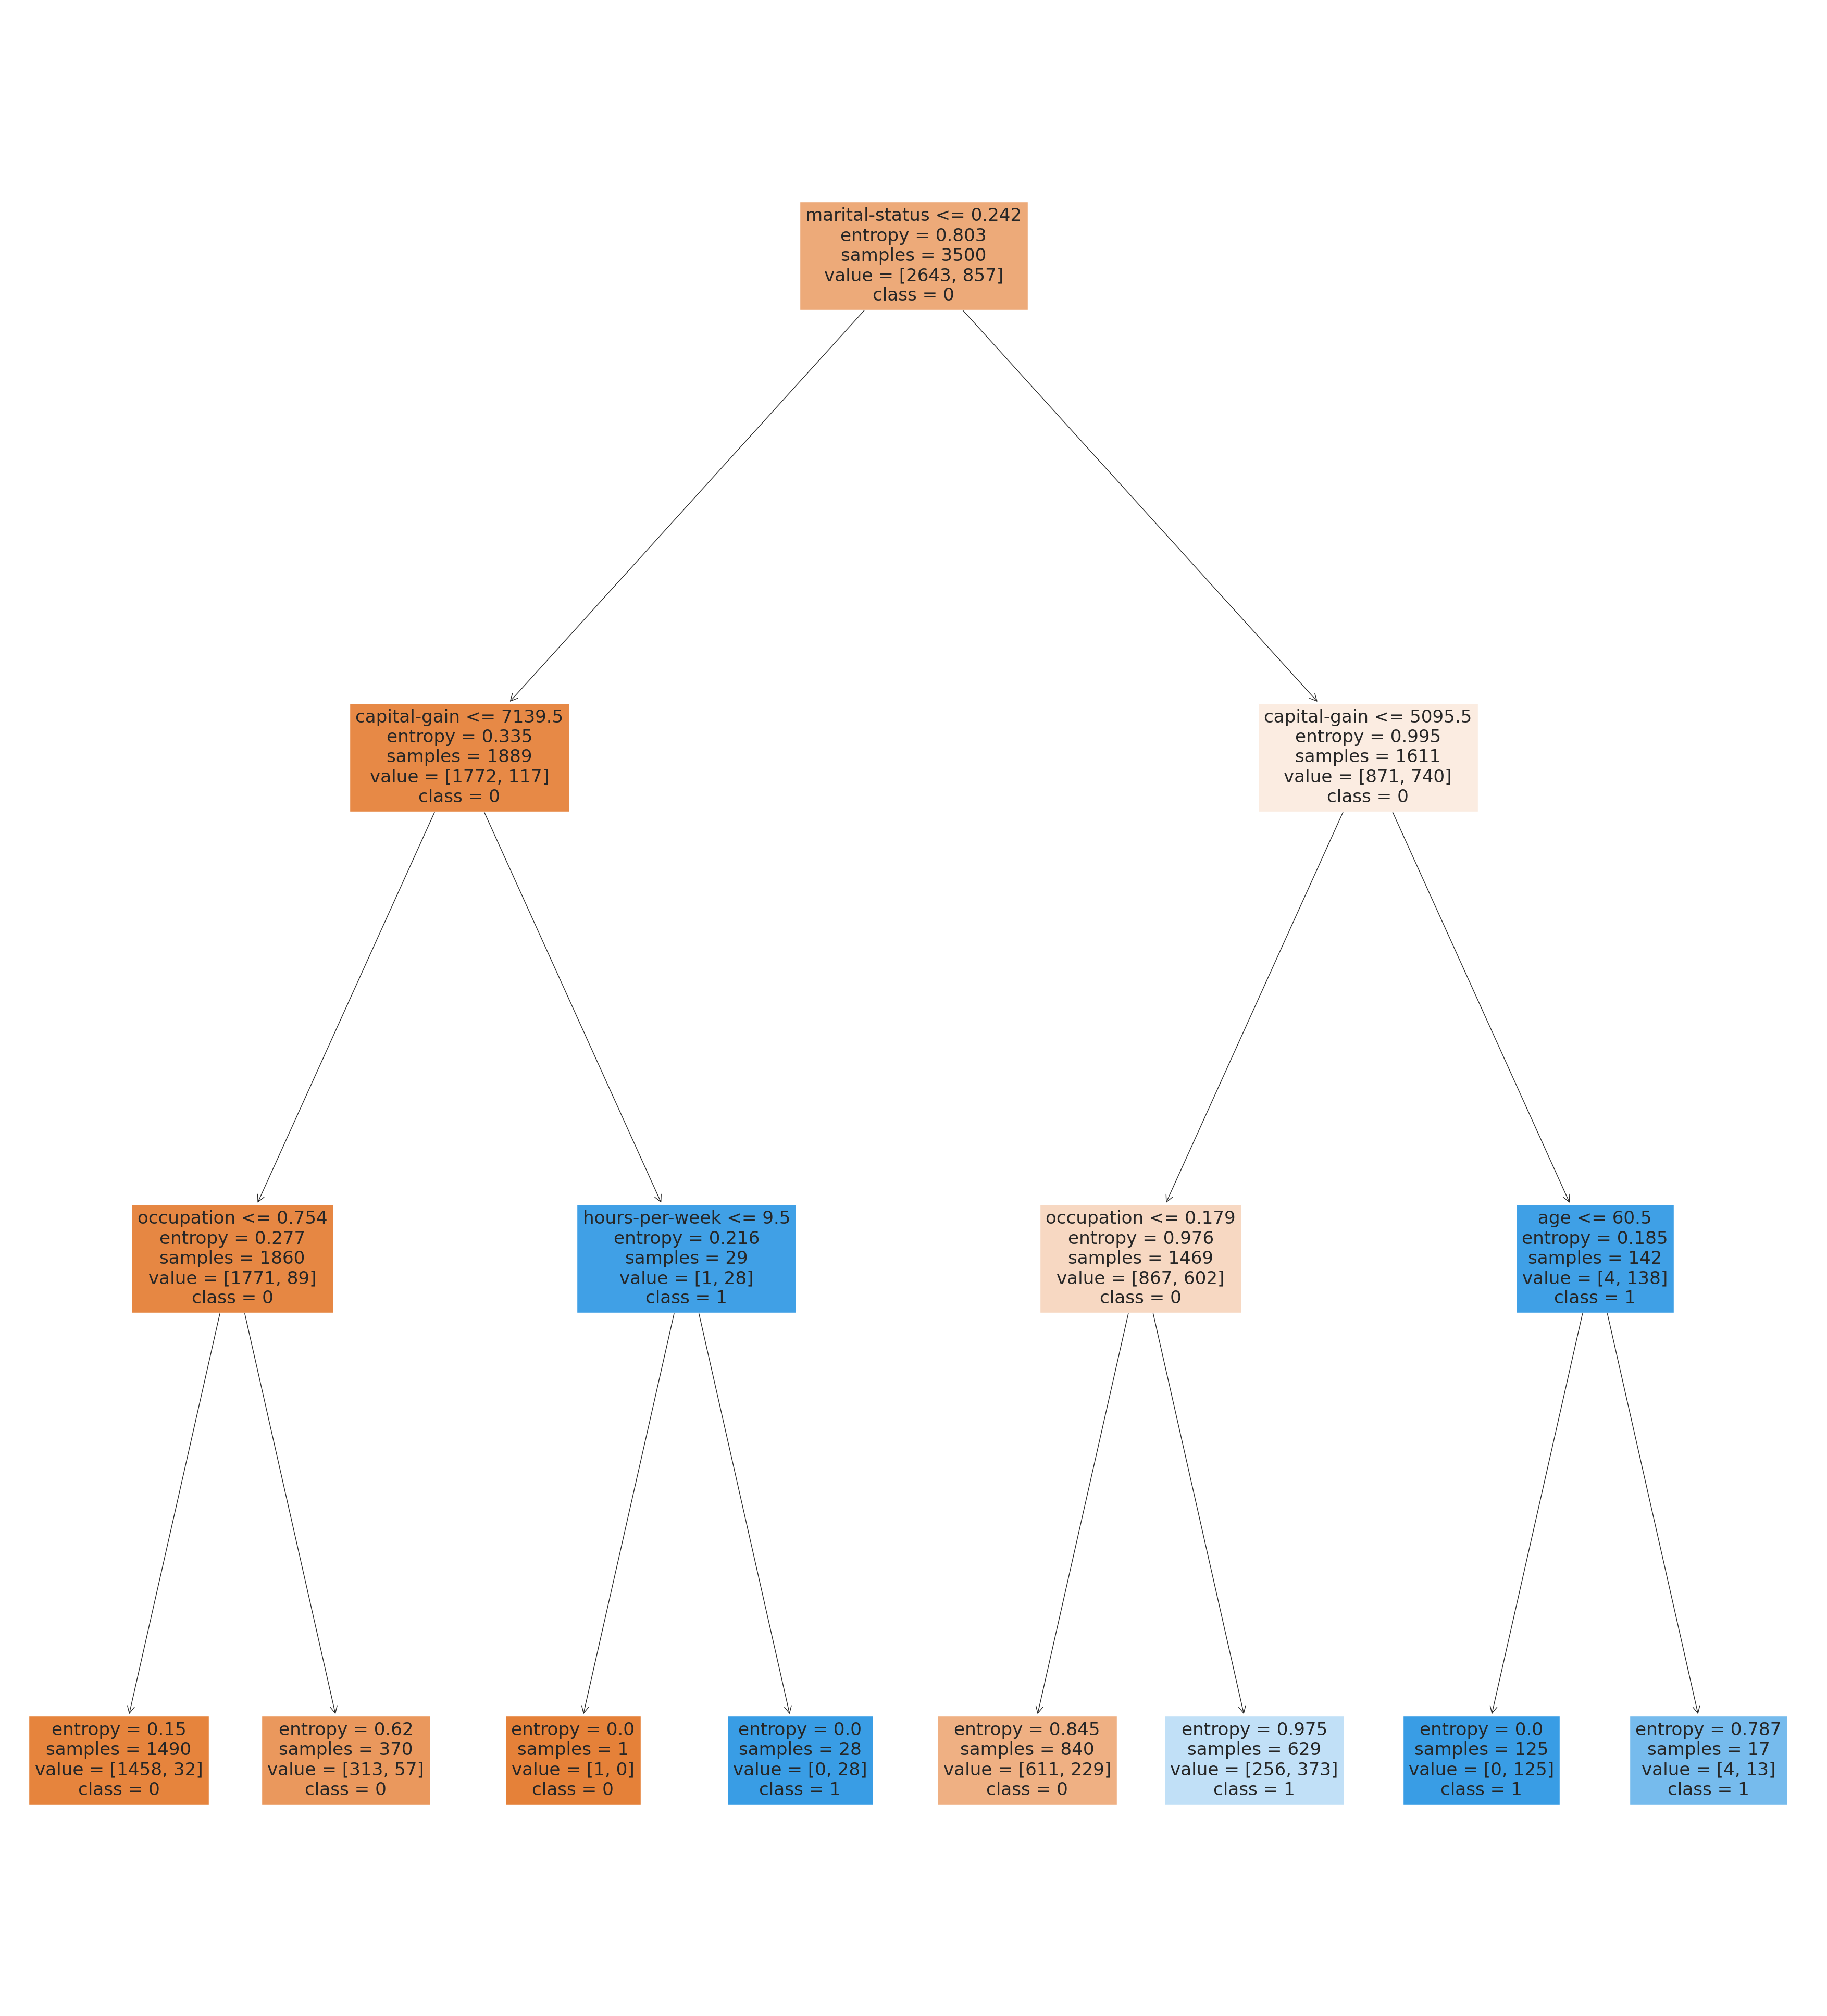

In [ ]:
fig = plt.figure(figsize=(45,50))
_ = tree.plot_tree(dt_e3,
                   feature_names=X_train.columns,
                   class_names=["0","1"],
                   filled=True) # it gives all the nodes in the color. If this is false then all of them will be in white

**Using Hyper parameters**

In [ ]:
tuned_paramaters = [{'criterion': ['entropy','gini'],
                     'max_depth': [5,10],  # 5,6,7,
                     'max_features': ["sqrt", "log2"], # it can be either square root of the feature or log of number of features
                     'min_samples_split': [2,5,8], # 1-3% of the total records
                     'min_samples_leaf': [1,5,9], # 1-3% of the min_sample_split
                     'max_leaf_nodes': [5,8]}]

In [ ]:
dt = DecisionTreeClassifier(random_state = 10)

tree_grid = GridSearchCV(estimator = dt, # The estimator can be is logistic, Linear reg, decision tree
                         param_grid = tuned_paramaters,
                         cv = 5)

In [ ]:
tree_grid_model = tree_grid.fit(X_train, y_train)
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 8, 'min_samples_leaf': 1, 'min_samples_split': 2} 



In [ ]:
dt_grid_model = DecisionTreeClassifier(criterion = 'entropy',
                                  max_depth = 5,
                                  max_features = 'sqrt',
                                  max_leaf_nodes = 8,
                                  min_samples_leaf = 1,
                                  min_samples_split = 2,
                                  random_state = 10)

In [ ]:
dt_grid_model= dt_grid_model.fit(X_train,y_train)

ypred_dt_tp = dt_grid_model.predict(X_test)

print(accuracy_score(y_test,ypred_dt_tp))
print(confusion_matrix(y_test,ypred_dt_tp))
print(classification_report(y_test,ypred_dt_tp))

0.8353333333333334
[[1099   34]
 [ 213  154]]
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1133
           1       0.82      0.42      0.55       367

    accuracy                           0.84      1500
   macro avg       0.83      0.69      0.73      1500
weighted avg       0.83      0.84      0.81      1500



In [ ]:
update_performance(name = 'Decision Tree-Tuned', model = dt_grid_model,test=y_test,pred=ypred_dt_tp)

# print the dataframe
perf_score

Model  Accuracy    Recall  Precision  F1 Score
0        LogisticReg-Base  0.846667  0.588556   0.732203  0.652568
1      LogisticReg-Youden  0.790000  0.866485   0.544521  0.668770
2         LogisticReg-skl  0.842000  0.583106   0.718121  0.643609
3             Gaussian NB  0.826000  0.542234   0.681507  0.603945
4            Bernoulli NB  0.801333  0.673025   0.581176  0.623737
5       KNearestNeighbour  0.828667  0.555858   0.684564  0.613534
6  KNearestNeighbour-grid  0.826667  0.479564   0.718367  0.575163
7      Decision Tree-Gini  0.813333  0.626703   0.616622  0.621622
8   Decision Tree-Entropy  0.810667  0.643052   0.606684  0.624339
9     Decision Tree-Tuned  0.835333  0.419619   0.819149  0.554955

## RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=10)

In [ ]:
rf.fit(X_train,y_train)
ypred_rf = rf.predict(X_test)

print(accuracy_score(y_test,ypred_rf))
print(confusion_matrix(y_test,ypred_rf))
print(classification_report(y_test,ypred_rf))

0.8446666666666667
[[1049   84]
 [ 149  218]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1133
           1       0.72      0.59      0.65       367

    accuracy                           0.84      1500
   macro avg       0.80      0.76      0.78      1500
weighted avg       0.84      0.84      0.84      1500



**Summarize the outcomes for Random Forest**

In [ ]:
update_performance(name = 'Random Forest', model = rf,test=y_test,pred=ypred_rf)

# print the dataframe
perf_score

Model  Accuracy    Recall  Precision  F1 Score
0         LogisticReg-Base  0.846667  0.588556   0.732203  0.652568
1       LogisticReg-Youden  0.790000  0.866485   0.544521  0.668770
2          LogisticReg-skl  0.842000  0.583106   0.718121  0.643609
3              Gaussian NB  0.826000  0.542234   0.681507  0.603945
4             Bernoulli NB  0.801333  0.673025   0.581176  0.623737
5        KNearestNeighbour  0.828667  0.555858   0.684564  0.613534
6   KNearestNeighbour-grid  0.826667  0.479564   0.718367  0.575163
7       Decision Tree-Gini  0.813333  0.626703   0.616622  0.621622
8    Decision Tree-Entropy  0.810667  0.643052   0.606684  0.624339
9      Decision Tree-Tuned  0.835333  0.419619   0.819149  0.554955
10           Random Forest  0.844667  0.594005   0.721854  0.651719

**Fine Tuning the performance**

In [ ]:
params =             [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [100],
                     'max_depth': [10, 15],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 8],
                     'min_samples_leaf': [5, 9],
                     'max_leaf_nodes': [8, 11]}]

In [ ]:
rf =RandomForestClassifier(random_state=10)

rf_cv = GridSearchCV(rf,params,cv=5,scoring='accuracy')

rf_cv.fit(X_train,y_train)

rf_cv.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': 11,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
rf_model = RandomForestClassifier(criterion ='gini' ,
                                  n_estimators =100 ,
                                  max_depth = 10 ,
                                  max_features = 'sqrt',
                                  max_leaf_nodes =11 ,
                                  min_samples_leaf =5 ,
                                  min_samples_split = 2,
                                  random_state = 10)

In [ ]:
rf_model.fit(X_train,y_train)

ypred_rf_tp = rf_model.predict(X_test)

In [ ]:
update_performance(name = 'Random Forest-Tunned', model = rf_model,test=y_test,pred=ypred_rf_tp)

# print the dataframe
perf_score

Model  Accuracy    Recall  Precision  F1 Score
0         LogisticReg-Base  0.846667  0.588556   0.732203  0.652568
1       LogisticReg-Youden  0.790000  0.866485   0.544521  0.668770
2          LogisticReg-skl  0.842000  0.583106   0.718121  0.643609
3              Gaussian NB  0.826000  0.542234   0.681507  0.603945
4             Bernoulli NB  0.801333  0.673025   0.581176  0.623737
5        KNearestNeighbour  0.828667  0.555858   0.684564  0.613534
6   KNearestNeighbour-grid  0.826667  0.479564   0.718367  0.575163
7       Decision Tree-Gini  0.813333  0.626703   0.616622  0.621622
8    Decision Tree-Entropy  0.810667  0.643052   0.606684  0.624339
9      Decision Tree-Tuned  0.835333  0.419619   0.819149  0.554955
10           Random Forest  0.844667  0.594005   0.721854  0.651719
11    Random Forest-Tunned  0.850667  0.534060   0.787149  0.636364

## Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier

dt=DecisionTreeClassifier(random_state=10)

bc=BaggingClassifier(dt) # by default the estimator is Decision Tree
bc.fit(X_train,y_train)

ypred_bc = bc.predict(X_test)

In [ ]:
update_performance(name = 'Bagging Classifier-dt', model = bc,test=y_test,pred=ypred_bc)

# print the dataframe
perf_score

Model  Accuracy    Recall  Precision  F1 Score
0         LogisticReg-Base  0.846667  0.588556   0.732203  0.652568
1       LogisticReg-Youden  0.790000  0.866485   0.544521  0.668770
2          LogisticReg-skl  0.842000  0.583106   0.718121  0.643609
3              Gaussian NB  0.826000  0.542234   0.681507  0.603945
4             Bernoulli NB  0.801333  0.673025   0.581176  0.623737
5        KNearestNeighbour  0.828667  0.555858   0.684564  0.613534
6   KNearestNeighbour-grid  0.826667  0.479564   0.718367  0.575163
7       Decision Tree-Gini  0.813333  0.626703   0.616622  0.621622
8    Decision Tree-Entropy  0.810667  0.643052   0.606684  0.624339
9      Decision Tree-Tuned  0.835333  0.419619   0.819149  0.554955
10           Random Forest  0.844667  0.594005   0.721854  0.651719
11    Random Forest-Tunned  0.850667  0.534060   0.787149  0.636364
12   Bagging Classifier-dt  0.834000  0.574932   0.694079  0.628912

**KNN Model as Base Learner**

In [ ]:
from sklearn.ensemble import BaggingClassifier

knn=KNeighborsClassifier()

bag_knn=BaggingClassifier(knn,random_state=10) # by default the estimator is Decision Tree
bag_knn.fit(X_train,y_train)

ypred_bag_knn = bag_knn.predict(X_test)

In [ ]:
update_performance(name = 'Bagging Classifier-knn', model = bag_knn,test=y_test,pred=ypred_bag_knn)

# print the dataframe
perf_score

Model  Accuracy    Recall  Precision  F1 Score
0         LogisticReg-Base  0.846667  0.588556   0.732203  0.652568
1       LogisticReg-Youden  0.790000  0.866485   0.544521  0.668770
2          LogisticReg-skl  0.842000  0.583106   0.718121  0.643609
3              Gaussian NB  0.826000  0.542234   0.681507  0.603945
4             Bernoulli NB  0.801333  0.673025   0.581176  0.623737
5        KNearestNeighbour  0.828667  0.555858   0.684564  0.613534
6   KNearestNeighbour-grid  0.826667  0.479564   0.718367  0.575163
7       Decision Tree-Gini  0.813333  0.626703   0.616622  0.621622
8    Decision Tree-Entropy  0.810667  0.643052   0.606684  0.624339
9      Decision Tree-Tuned  0.835333  0.419619   0.819149  0.554955
10           Random Forest  0.844667  0.594005   0.721854  0.651719
11    Random Forest-Tunned  0.850667  0.534060   0.787149  0.636364
12   Bagging Classifier-dt  0.834000  0.574932   0.694079  0.628912
13  Bagging Classifier-knn  0.835333  0.580381   0.696078  0.632987

**Ensemble Learning- AdaBoosting**

In [ ]:
from sklearn.ensemble  import AdaBoostClassifier

In [ ]:
abcl = AdaBoostClassifier(dt,random_state=10)
abcl.fit(X_train,y_train)

ypred_abcl = abcl.predict(X_test)

In [ ]:
update_performance(name = 'AdaBoost-dt', model = abcl,test=y_test,pred=ypred_abcl)

# print the dataframe
perf_score

Model  Accuracy    Recall  Precision  F1 Score
0         LogisticReg-Base  0.846667  0.588556   0.732203  0.652568
1       LogisticReg-Youden  0.790000  0.866485   0.544521  0.668770
2          LogisticReg-skl  0.842000  0.583106   0.718121  0.643609
3              Gaussian NB  0.826000  0.542234   0.681507  0.603945
4             Bernoulli NB  0.801333  0.673025   0.581176  0.623737
5        KNearestNeighbour  0.828667  0.555858   0.684564  0.613534
6   KNearestNeighbour-grid  0.826667  0.479564   0.718367  0.575163
7       Decision Tree-Gini  0.813333  0.626703   0.616622  0.621622
8    Decision Tree-Entropy  0.810667  0.643052   0.606684  0.624339
9      Decision Tree-Tuned  0.835333  0.419619   0.819149  0.554955
10           Random Forest  0.844667  0.594005   0.721854  0.651719
11    Random Forest-Tunned  0.850667  0.534060   0.787149  0.636364
12   Bagging Classifier-dt  0.834000  0.574932   0.694079  0.628912
13  Bagging Classifier-knn  0.835333  0.580381   0.696078  0.632987
14             AdaBoost-dt  0.796667  0.613079   0.579897  0.596026

**Ensemble Learning - Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier



In [ ]:
gbcl = GradientBoostingClassifier(n_estimators=50,learning_rate=0.5,random_state=10,max_depth=3)
gbcl.fit(X_train,y_train)
ypred_gbcl = gbcl.predict(X_test)


In [ ]:
update_performance(name = 'Gradient Boosting', model = gbcl,test=y_test,pred=ypred_gbcl)

# print the dataframe
perf_score

Model  Accuracy    Recall  Precision  F1 Score
0         LogisticReg-Base  0.846667  0.588556   0.732203  0.652568
1       LogisticReg-Youden  0.790000  0.866485   0.544521  0.668770
2          LogisticReg-skl  0.842000  0.583106   0.718121  0.643609
3              Gaussian NB  0.826000  0.542234   0.681507  0.603945
4             Bernoulli NB  0.801333  0.673025   0.581176  0.623737
5        KNearestNeighbour  0.828667  0.555858   0.684564  0.613534
6   KNearestNeighbour-grid  0.826667  0.479564   0.718367  0.575163
7       Decision Tree-Gini  0.813333  0.626703   0.616622  0.621622
8    Decision Tree-Entropy  0.810667  0.643052   0.606684  0.624339
9      Decision Tree-Tuned  0.835333  0.419619   0.819149  0.554955
10           Random Forest  0.844667  0.594005   0.721854  0.651719
11    Random Forest-Tunned  0.850667  0.534060   0.787149  0.636364
12   Bagging Classifier-dt  0.834000  0.574932   0.694079  0.628912
13  Bagging Classifier-knn  0.835333  0.580381   0.696078  0.632987
14             AdaBoost-dt  0.796667  0.613079   0.579897  0.596026
15       Gradient Boosting  0.859333  0.629428   0.754902  0.686478

**XGBoost**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb= XGBClassifier(booster='gbtree',gamma=3,max_depth=3, min_child_weight=3,
                   n_estimator=50, reg_lambda=1,random_state=10)
xgb.fit(X_train,y_train)


ypred_xgb= xgb.predict(X_test)

[01:06:04] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.



In [ ]:
update_performance(name = 'XGB', model = xgb,test=y_test,pred=ypred_xgb)

# print the dataframe
perf_score

Model  Accuracy    Recall  Precision  F1 Score
0         LogisticReg-Base  0.846667  0.588556   0.732203  0.652568
1       LogisticReg-Youden  0.790000  0.866485   0.544521  0.668770
2          LogisticReg-skl  0.842000  0.583106   0.718121  0.643609
3              Gaussian NB  0.826000  0.542234   0.681507  0.603945
4             Bernoulli NB  0.801333  0.673025   0.581176  0.623737
5        KNearestNeighbour  0.828667  0.555858   0.684564  0.613534
6   KNearestNeighbour-grid  0.826667  0.479564   0.718367  0.575163
7       Decision Tree-Gini  0.813333  0.626703   0.616622  0.621622
8    Decision Tree-Entropy  0.810667  0.643052   0.606684  0.624339
9      Decision Tree-Tuned  0.835333  0.419619   0.819149  0.554955
10           Random Forest  0.844667  0.594005   0.721854  0.651719
11    Random Forest-Tunned  0.850667  0.534060   0.787149  0.636364
12   Bagging Classifier-dt  0.834000  0.574932   0.694079  0.628912
13  Bagging Classifier-knn  0.835333  0.580381   0.696078  0.632987
14             AdaBoost-dt  0.796667  0.613079   0.579897  0.596026
15       Gradient Boosting  0.859333  0.629428   0.754902  0.686478
16                     XGB  0.862000  0.599455   0.785714  0.680062